# **Weighted Ensemble**  

###### contributed by **Hima Varshini Parasa**

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the CSV file
data = pd.read_csv('/content/prediction_labels.csv')

# Define the columns for the model predictions
model_columns = ['VADER', 'DISTILLBERT', 'ROBERTA', 'BertTweet', 'gpt2', 'FINBERT']

# Split into features and target
X = data[model_columns]  # Predictions from the 6 LLMs
y = data['label']        # True sentiment

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually set weights for the predictions from the 6 LLMs
# Ensure the weights sum to 1
manual_weights = [0.15, 0.25, 0.25, 0.20, 0.10, 0.05]

# Convert weights to numpy array for easier manipulation
manual_weights = np.array(manual_weights)

# Ensure weights sum to 1
manual_weights = manual_weights / np.sum(manual_weights)

# Print the manual weights
print("Manual Weights:", manual_weights)

# Predict on the test set using the manually set weights
weighted_predictions_test = np.average(X_test, axis=1, weights=manual_weights)
weighted_predictions_test = np.round(weighted_predictions_test).astype(int)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, weighted_predictions_test)
print("Ensemble Model Accuracy:", accuracy)


Manual Weights: [0.15 0.25 0.25 0.2  0.1  0.05]
Ensemble Model Accuracy: 0.8061749571183533


Manual Weights: [0.15 0.25 0.25 0.2  0.1  0.05]
Ensemble Model Accuracy: 0.8061749571183533

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       710
           1       0.66      0.66      0.66       461
           2       0.83      0.85      0.84       578

    accuracy                           0.81      1749
   macro avg       0.79      0.79      0.79      1749
weighted avg       0.81      0.81      0.81      1749


Confusion Matrix:
[[616  83  11]
 [ 66 302  93]
 [ 14  72 492]]


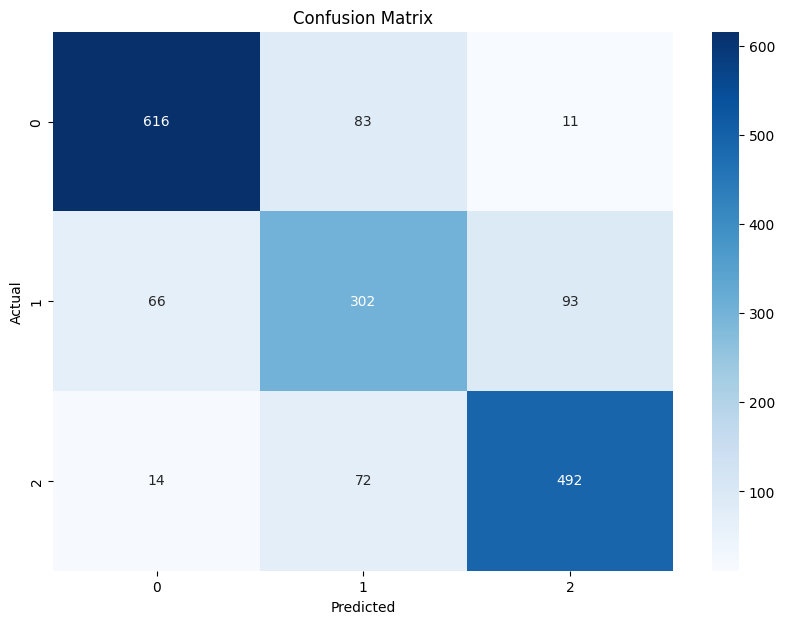

In [23]:
# Install necessary libraries in Colab (if needed)
!pip install scikit-learn pandas numpy matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/content/prediction_labels.csv')

# Define the columns for the model predictions
model_columns = ['VADER', 'DISTILLBERT', 'ROBERTA', 'BertTweet', 'gpt2', 'FINBERT']

# Split into features and target
X = data[model_columns]  # Predictions from the 6 LLMs
y = data['label']        # True sentiment

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually set weights for the predictions from the 6 LLMs
# Ensure the weights sum to 1
manual_weights = [0.15, 0.25, 0.25, 0.20, 0.10, 0.05]

# Convert weights to numpy array for easier manipulation
manual_weights = np.array(manual_weights)

# Ensure weights sum to 1
manual_weights = manual_weights / np.sum(manual_weights)

# Print the manual weights
print("Manual Weights:", manual_weights)

# Predict on the test set using the manually set weights
weighted_predictions_test = np.average(X_test, axis=1, weights=manual_weights)
weighted_predictions_test = np.round(weighted_predictions_test).astype(int)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, weighted_predictions_test)
print("Ensemble Model Accuracy:", accuracy)

# Classification report
report = classification_report(y_test, weighted_predictions_test, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_test, weighted_predictions_test))

# Confusion matrix
cm = confusion_matrix(y_test, weighted_predictions_test)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Ensemble Model Accuracy: 0.8061749571183533

Classification Report (Ensemble Model):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       710
           1       0.66      0.66      0.66       461
           2       0.83      0.85      0.84       578

    accuracy                           0.81      1749
   macro avg       0.79      0.79      0.79      1749
weighted avg       0.81      0.81      0.81      1749


Confusion Matrix:
[[616  83  11]
 [ 66 302  93]
 [ 14  72 492]]


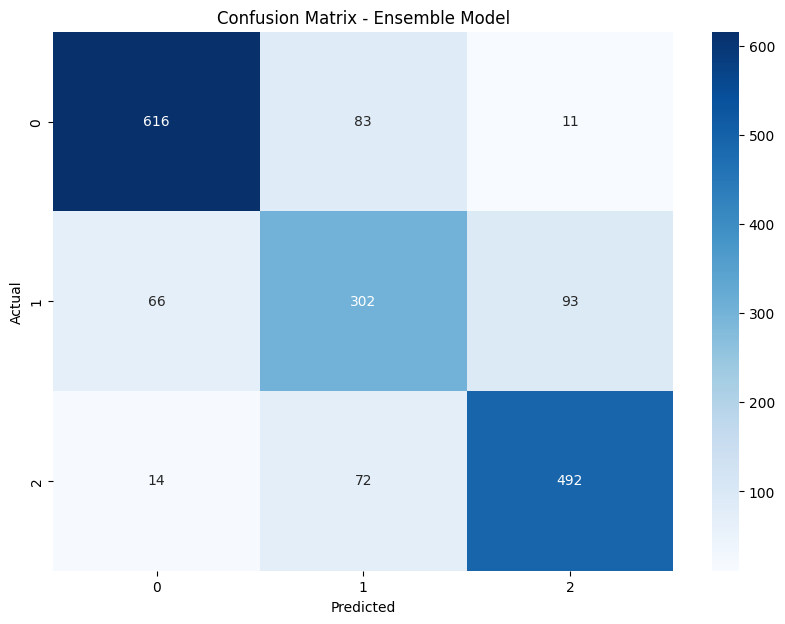

<Figure size 1000x600 with 0 Axes>

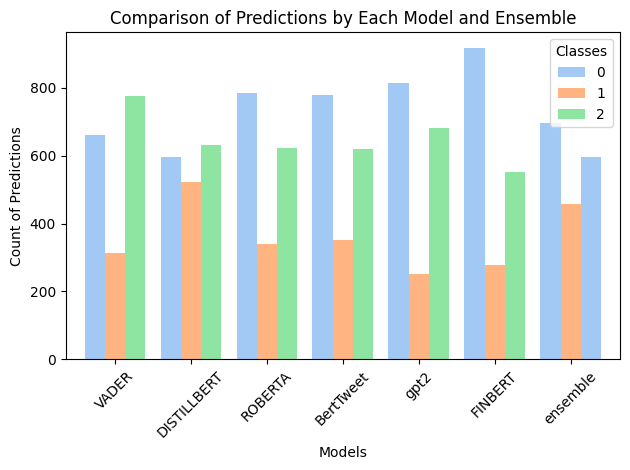

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/content/prediction_labels.csv')

# Define the columns for the model predictions
model_columns = ['VADER', 'DISTILLBERT', 'ROBERTA', 'BertTweet', 'gpt2', 'FINBERT']

# Split into features and target
X = data[model_columns]  # Predictions from the 6 LLMs
y = data['label']        # True sentiment

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually set weights for the predictions from the 6 LLMs
manual_weights = [0.15, 0.25, 0.25, 0.20, 0.10, 0.05]

# Convert weights to numpy array for easier manipulation
manual_weights = np.array(manual_weights)

# Ensure weights sum to 1
manual_weights = manual_weights / np.sum(manual_weights)

# Predict on the test set using the manually set weights
weighted_predictions_test = np.average(X_test, axis=1, weights=manual_weights)
weighted_predictions_test = np.round(weighted_predictions_test).astype(int)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, weighted_predictions_test)
print("Ensemble Model Accuracy:", accuracy)

# Detailed performance evaluation
print("\nClassification Report (Ensemble Model):")
print(classification_report(y_test, weighted_predictions_test))

# Confusion matrix
cm = confusion_matrix(y_test, weighted_predictions_test)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()

# Model-wise predictions
model_predictions = {col: X_test[col].values for col in model_columns}
model_predictions['ensemble'] = weighted_predictions_test

# Calculate the number of 0s, 1s, and 2s predicted by each model
prediction_counts = {model: [np.sum(pred == 0), np.sum(pred == 1), np.sum(pred == 2)]
                     for model, pred in model_predictions.items()}

# Convert the counts into a DataFrame for easy plotting
counts_df = pd.DataFrame(prediction_counts, index=['0', '1', '2']).T

# Plot bar chart for model predictions with pastel colors
plt.figure(figsize=(10, 6))
ax = counts_df.plot(kind='bar', color=sns.color_palette("pastel", len(counts_df.columns)), width=0.8)
plt.title('Comparison of Predictions by Each Model and Ensemble')
plt.xlabel('Models')
plt.ylabel('Count of Predictions')
plt.xticks(rotation=45)
plt.legend(title='Classes', loc='upper right')
plt.tight_layout()

# Separate the ensemble bar and set a different color for it
ax.patches[-1].set_facecolor(sns.color_palette("pastel")[0])  # Change the ensemble color
plt.show()
